In [1]:
#importing the dependencies for the  project
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd

import os
import re
import nltk

In [2]:
import csv
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [4]:
print(train['author'][0])
train.head()
#Label is 1 for real news and 0 for fake news

Darrell Lucus


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
##Checking how many null values we have
print(train.isnull().sum())
print('\n')
test.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64




id          0
title     122
author    503
text        7
dtype: int64

In [6]:
##Filling the NAn values with a space
test = test.fillna(' ')
train = train.fillna(' ')
test['total'] = test['title'] + test['author'] + test['text']
train['total'] = train['title'] + train['author'] + train['text']

## Creating wordcloud visuals

In [9]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

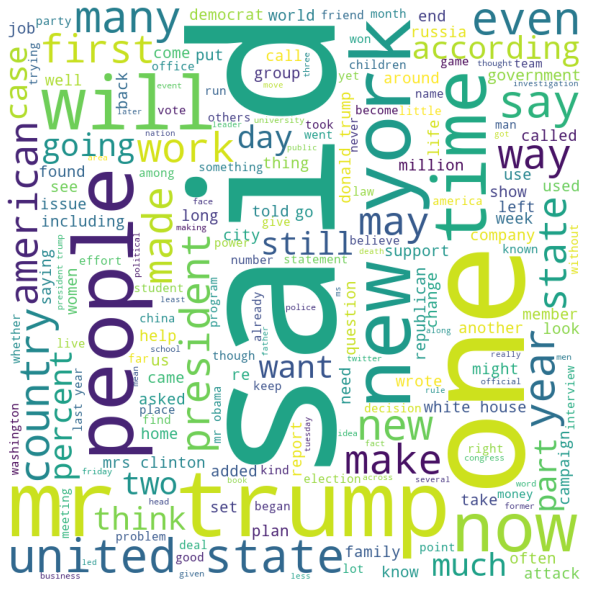

In [12]:
#Wordcloud of fake words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

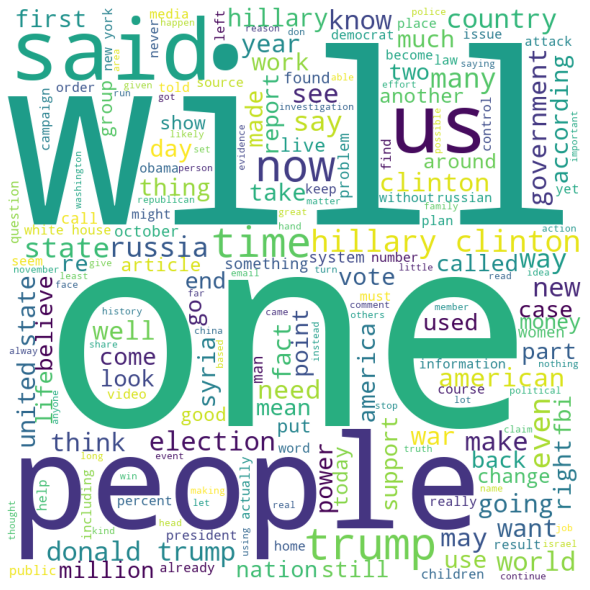

In [13]:
#wordcloud of real words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Cleaning and preprocessing

## 1. Regex

In [19]:
#Using Regex to remove punctuations from the sring 
s = "!</> hello this is$$ </>^an !!!ex%%am&&%$ple@@@^^^&&!& </>*of@#&&\ r@@@##%^^&e!@#%%$gex"
s = re.sub(r'[^\w\s]','',s) #input format(what to exempt from removing, what to replace removed 
                            #character with,input string)
print(s)

 hello this is an example of regex


## 2. Tokenization

In [23]:
#Tokenization is breaking of sentences into individual words. We can only perform on words
#These tokens help in understanding the context or developing the model for the NLP. 
#The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.
nltk.download('punkt') 
#punkt is a tokenizer

[nltk_data] Downloading package punkt to /home/shivang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#example of token generation
nltk.word_tokenize('Simple example to show tokenization')

['Simple', 'example', 'to', 'show', 'tokenization']

## 3. Stopwords

In [30]:
#A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine 
#has been programmed to ignore
from nltk.corpus import stopwords
nltk.download('stopwords') #Downoading stopwords library
stop_words = stopwords.words('english') #Dowloading stopwords for english language
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shivang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
#Using tokenizer and stopwords
sentence = "This is an example to show how to use tokenizer and stopwords"
words = nltk.word_tokenize(sentence)
words = [word for word in words if word not in stop_words]
print(words)

['This', 'example', 'show', 'use', 'tokenizer', 'stopwords']


## 4. Lemmatization

In [33]:
#Lemmatization reduces the word to it's dictionary form like studying to study
#Superior technique than Stemming coz stemming works based upon said rules which may not work in all scnearios
#Use stemming when lemmatization library is unavailable for a praticular language
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
example_str="been had done languages cities mice"
#Now tokenize the sentence
example_str = nltk.word_tokenize(example_str)
#Lemmatize each word
for word in example_str:
    print(lemmatizer.lemmatize(word))

[nltk_data] Downloading package wordnet to /home/shivang/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


been
had
done
language
city
mouse


## Applying them on training data

In [34]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows(): #iterating through each row
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning using regex
    
    words = nltk.word_tokenize(sentence) #tokenization of the sentence
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words: #Lemmatizer
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence

In [42]:
print(train.head()) #total has the preprocessed text
train = train[['total','label']] #we will just need these 2 columns from now on

                                               total  label
0   house dem aide we didnt even see comeys lette...      1
1   flynn hillary clinton big woman campus breitb...      0
2   why truth might get you firedconsortiumnewsco...      1
3   15 civilians killed in single us airstrike ha...      1
4   iranian woman jailed fictional unpublished st...      1


## Applying NLP techniques

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
X_train = train['total']
Y_train = train['label']



In [89]:
X_train1 = train['total']
Y_train1 = train['label']

## BagOfWords/Count Vectorizer

In [45]:
#Bagofwords creates a one hot encoded vector for each word in the dictionary
#input = ['create', 'a', 'vecotr'] then create will have [1,0,0], a will have [0,1,0] and so on
#Count Vecorizer replaces the 1 with the frequency of the word in the dictionary instead
corpus = ['First line',
         'Second line',
         'Third line',
         'and so on']
vectorizer = CountVectorizer() #Example how to use count vectorizer
X = vectorizer.fit_transform(corpus) #Creates a dictionary on given corpus
print(vectorizer.get_feature_names())

['and', 'first', 'line', 'on', 'second', 'so', 'third']


In [47]:
print(X.toarray()) #This shows us how count vectorizer works

[[0 1 1 0 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 1 0 0 0 1]
 [1 0 0 1 0 1 0]]


## TF-iDF  Vectorizer

In [57]:
#Bag of Words has a limitation that it does not capture the essense of a word
#TFiDF: Term frequency which is just like count vectorizer. Idf is inverse document frequency.
#Idf shows how important is the word in the document. It penalises most occuring and
#rewards rarely occuring words
def vectorize_text(features, max_features):#max_feature just means how many top words to use
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),#n-gram is a contiguous sequence of n items from a given sample of text or speech.
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [58]:
tfidf_features = vectorize_text(['You know how to use tfidf','This is how you use tfidf'],30)
#30 is the max features

In [59]:
tfidf_features

array([[0.53309782, 0.53309782, 0.37930349, 0.37930349, 0.37930349],
       [0.        , 0.        , 0.57735027, 0.57735027, 0.57735027]])

## Applying tf idf

In [60]:
#Feature extraction using count vectorization and tfidf.
#Using count vectorizer and then applying tfidf on top of that
#tfidf works better with count vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [62]:
#tf_idf_matrix.toarray().shape
#This gives us an array of shape(20800,22819) where 20800 are number of samples and 228119 number of features

## Confusion matrix

In [64]:
#
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Modelling

In [67]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts) #applying transform on test data

#splitting in train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state = 0)

In [71]:
print(X_train.shape,y_train.shape,y_test.shape,X_test.shape)

(15600, 228119) (15600,) (5200,) (5200, 228119)


## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression# Logistic Regression
logreg = LogisticRegression(C=1e5) #Regularisation parameter used to avoid overfitting(keep it as low as possible)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm
#2572 TruePositives ie real news and correctly classified
#2467 TrueNegatives is fake news and correctly classified
#97 FalesPositives ie fake news and incorrectly classified. We should try to have this number lowest
#64 FalseNegatives is true news and incorrectly classified

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97


/home/shivang/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2467,   97],
       [  64, 2572]])

## Multinomial NB

In [76]:
from sklearn.naive_bayes import MultinomialNB #Classifier based on conditional probability

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm
#Here the number of FalsePositives went down but FalseNegaatives went way up. Not a good tradeoff

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.83


array([[2554,   10],
       [ 884, 1752]])

## Deployment Pipeline

In [81]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model

In [90]:
pipeline = Pipeline([
    ('vectorize', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('classify', linear_model.LogisticRegression(C=1e5)),
])
#We can replace the preprocessing techniques or regressor used if we want to do so later

In [92]:
pipeline.fit(X_train1, Y_train1)

/home/shivang/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorize', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classify', LogisticRegression(C=100000.0))])

In [95]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [96]:
filename = './pipeline.sav'

## Prediction

In [97]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result) 

[0]
